In [1]:
# To import the data we need the dicom library
import os
import numpy as np
from matplotlib import pyplot as plt

In [141]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from os.path import dirname, join
from pprint import pprint

import pydicom
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir

# fetch the path to the test data
#filepath = get_testdata_files('DICOMDIR')[0]
#print('Path to the DICOM directory: {}'.format(filepath))
# load the data

def _getstudies(filepath):
    filepath = filepath 
    dicom_dir = read_dicomdir(filepath)
    base_dir = dirname(filepath)

    allstudies = {}

    # go through the patient record and print information
    for patient_record in dicom_dir.patient_records:
        if (hasattr(patient_record, 'PatientID') and
                hasattr(patient_record, 'PatientName')):
            print("Patient: {}: {}".format(patient_record.PatientID,
                                           patient_record.PatientName))
        studies = patient_record.children
        # got through each serie
        for study in studies:
            print(" " * 4 + "Study {}: {}: {}".format(study.StudyID,
                                                      study.StudyDate,
                                                      study.StudyDescription))
            allstudies[study.StudyID] = []
            all_series = study.children
            # go through each serie
            tmpseries = {}
            for series in all_series:
                image_count = len(series.children)
                plural = ('', 's')[image_count > 1]

                # Write basic series info and image count

                # Put N/A in if no Series Description
                if 'SeriesDescription' not in series:
                    series.SeriesDescription = "N/A"
                print(" " * 8 + "Series {}: {}: {} ({} image{})".format(
                    series.SeriesNumber, series.Modality, series.SeriesDescription,
                    image_count, plural))

                # Open and read something from each image, for demonstration
                # purposes. For simple quick overview of DICOMDIR, leave the
                # following out
                print(" " * 12 + "Reading images...")
                image_records = series.children
                image_filenames = [join(base_dir, *image_rec.ReferencedFileID)
                                   for image_rec in image_records]

                datasets = [pydicom.dcmread(image_filename)
                            for image_filename in image_filenames]

                patient_names = set(ds.PatientName for ds in datasets)
                patient_IDs = set(ds.PatientID for ds in datasets)

                # List the image filenames
                print("\n" + " " * 12 + "Image filenames:")
                print(" " * 12, end=' ')
                pprint(image_filenames, indent=12)

                # Expect all images to have same patient name, id
                # Show the set of all names, IDs found (should each have one)
                print(" " * 12 + "Patient Names in images..: {}".format(
                    patient_names))
                print(" " * 12 + "Patient IDs in images..: {}".format(
                    patient_IDs))
                tmpseries[int(series.SeriesNumber)] = datasets

            allstudies[study.StudyID].append(tmpseries)
    return allstudies

# These are the dicom studies in the dicomdir
allstudies = _getstudies("Thorax_Abdomen/week1/DICOMDIR")

Patient: ANON864M5E16Q: Anonymous Female 1934
    Study E864M5E16Q: 20181017: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (128 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EED9D21E',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE28D880',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE0D01B4',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EEF91F10',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE92D375',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EEFBB3D1',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE16248D',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE415A37',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE1EE477',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE628D6B',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE47F092',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE888752',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE79901C',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE1F7D76',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE57CC31',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE91779C',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EEBE6323',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE23FAA9',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEE865E0',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEF3C35B',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEC28176',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE1DEA05',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE12FF45',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEE163B2',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEF1083B',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EED36E44',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE8393B5',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EED6C9D4',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEC6DE97',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE84BE9A',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEA30DD8',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE361F0C',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEA70AC2',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE62BB86',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEF6FC32',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE363DAB',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEDE287D',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE331EB4',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE355F4D',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE696E28',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE4654F2',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEAE25E6',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEEF6AE3',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEB8FC57',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE46C285',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE15ED52',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE2E5DC4',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEAFF28E',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEE6CB2C',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEAD6885',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE3EF74A',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE0C1D84',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEE79B36',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE0B9A35',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE74B3D9',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEAF6DE0',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEA46C5B',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEA7E969',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EED9E9D1',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE97E68F',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE0F0DC6',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE8192CE',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEB57236',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE759D82',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEC6D64E',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE1ED526',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE83C09E',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEC39B13',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE7F0D9C',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE39930A',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE435147',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE6B9339',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEDEE944',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE940F67',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEC0D8DA',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEED4D2B',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE4470E5',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE2D7D38',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEC00823',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE04C06B',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE87DE4C',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEE1C2AB',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE691004',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE0CD445',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE873BE3',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE4900E6',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEC90865',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE1AC900',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEFDAF5D',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE3968CF',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE185C66',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEB3FD03',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEB46B2F',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE8706B8',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE489CF4',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEF93C85',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE459C1B',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE2A7762',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE67B71D',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE6D662A',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE5D39F4',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEC9BAE0',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEECEE62',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEDF0857',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE1A19D2',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE065422',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE4FDD07',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE2BC50F',
            'Thorax_Abdomen

# Functions to determine size of a patient

In [117]:
def sizeSlice(pixelarray):
    ## determines the amount of pixels that are above the threshold for a slice
    threshold_mask = pixelarray > 800
    tmpmask = ndimage.binary_erosion(threshold_mask,iterations =6)
    closedmask = ndimage.binary_fill_holes(tmpmask)
    return np.sum(closedmask)      ## # pixels above threshold

def sizePatient(patient):
    ## gives volume of scanned body in liters
    volume = 0
    for s in patient:
        volume += sizeSlice(s.pixel_array)*s.PixelSpacing[0]*s.PixelSpacing[1]*s.SliceThickness
    return volume*10**(-6)

##
# (0018, 0050) Slice Thickness                     DS: "5"
# (0028, 0030) Pixel Spacing                       DS: ['0.630859375', '0.630859375']
# (0028, 0010) Rows                                US: 512
# (0028, 0011) Columns                             US: 512

# allstudies['E864M5E14Q'][0][8][100].PixelSpacing[0]
# sizePatient(allstudies['E864M5E14Q'][0][8])*10**(-6)

Looking at the two patients below, we see that the first person has a volume of 32 dm^3 and the second is a fat lady of 51 dm^3 (only abdomen!), we can see a lot more fat around here belly ;)

32.303050046081545

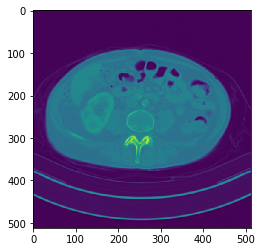

In [154]:

plt.imshow(allstudies['E864M5E16Q'][0][1][80].pixel_array)
sizePatient(allstudies['E864M5E16Q'][0][1])


51.51262968841552

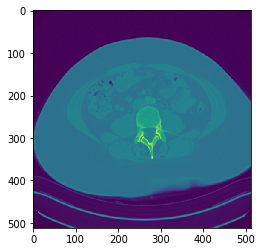

In [153]:
plt.imshow(allstudies['E864M5E17Q'][0][7][80].pixel_array)
sizePatient(allstudies['E864M5E17Q'][0][7])

# Effect size on dosis

In [125]:
from sklearn.linear_model import LinearRegression

In [119]:
basedir = "Thorax_Abdomen/"
ctdatadir = os.listdir(basedir)

doseoverview = {}
sizeoverview = {}

for tmpdata in ctdatadir:
    weekstudies = _getstudies(os.path.join(basedir,tmpdata,"DICOMDIR"))
    for key in weekstudies.keys():
        tmpstudy = weekstudies[key][0]
        if len(tmpstudy.keys()) > 1:
            print ("More than 1 study for this patient!")
            break
            
        seriesid = list(tmpstudy.keys())
#         print(seriesid)
        seriesid = seriesid[0]
        doseoverview[key] = tmpstudy[seriesid][0].CTDIvol
        
        sizeoverview[key] = sizePatient(tmpstudy[seriesid])
        
        

Patient: ANON864M5E16Q: Anonymous Female 1934
    Study E864M5E16Q: 20181017: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (128 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EED9D21E',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE28D880',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE0D01B4',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EEF91F10',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE92D375',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EEFBB3D1',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE16248D',
            'Thorax_Abdomen/week1\\DICOM\\000004E1\\AA67D814\\AA417B20\\00006A1B\\EE415A37',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE1EE477',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE628D6B',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE47F092',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE888752',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE79901C',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE1F7D76',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE57CC31',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE91779C',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EEBE6323',
            'Thorax_Abdomen/week1\\DICOM\\00003E63\\AAF487DB\\AA97ED70\\00009FC9\\EE23FAA9',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEE865E0',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEF3C35B',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEC28176',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE1DEA05',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE12FF45',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEE163B2',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EEF1083B',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EED36E44',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EE8393B5',
            'Thorax_Abdomen/week1\\DICOM\\00001027\\AA0C0C4D\\AA8A2025\\00008EBB\\EED6C9D4',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEC6DE97',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE84BE9A',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEA30DD8',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE361F0C',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEA70AC2',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE62BB86',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEF6FC32',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE363DAB',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EEDE287D',
            'Thorax_Abdomen/week1\\DICOM\\0000C85B\\AAC79207\\AA901A4A\\00007923\\EE331EB4',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE355F4D',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE696E28',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE4654F2',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEAE25E6',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEEF6AE3',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEB8FC57',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE46C285',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE15ED52',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EE2E5DC4',
            'Thorax_Abdomen/week1\\DICOM\\00004C11\\AA4DD575\\AA24025E\\0000106C\\EEAFF28E',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEE6CB2C',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEAD6885',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE3EF74A',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE0C1D84',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEE79B36',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE0B9A35',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EE74B3D9',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEAF6DE0',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEA46C5B',
            'Thorax_Abdomen/week1\\DICOM\\00005EB5\\AAECF7C8\\AAF299FE\\0000A8E8\\EEA7E969',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EED9E9D1',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE97E68F',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE0F0DC6',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE8192CE',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEB57236',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE759D82',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEC6D64E',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE1ED526',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EE83C09E',
            'Thorax_Abdomen/week1\\DICOM\\0000C7E5\\AA082F5E\\AA9A426D\\00005978\\EEC39B13',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE7F0D9C',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE39930A',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE435147',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE6B9339',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEDEE944',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE940F67',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEC0D8DA',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EEED4D2B',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE4470E5',
            'Thorax_Abdomen/week1\\DICOM\\00006E66\\AA709C4B\\AA2FF3B9\\0000CFF6\\EE2D7D38',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEC00823',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE04C06B',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE87DE4C',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEE1C2AB',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE691004',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE0CD445',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE873BE3',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE4900E6',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EEC90865',
            'Thorax_Abdomen/week1\\DICOM\\000078E2\\AA2BD47B\\AAFAFA29\\00002E3B\\EE1AC900',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEFDAF5D',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE3968CF',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE185C66',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEB3FD03',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEB46B2F',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE8706B8',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE489CF4',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EEF93C85',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE459C1B',
            'Thorax_Abdomen/week1\\DICOM\\00000D5E\\AA02E1D6\\AAA8E2A6\\0000214F\\EE2A7762',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE67B71D',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE6D662A',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE5D39F4',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEC9BAE0',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEECEE62',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EEDF0857',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE1A19D2',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE065422',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE4FDD07',
            'Thorax_Abdomen/week1\\DICOM\\0000BF29\\AAAE8B07\\AAD998F2\\00007D92\\EE2BC50F',
            'Thorax_Abdomen

Patient: ANONUEQN5E1G0: Anonymous Female 1935
    Study EUEQN5E1G0: 20181023: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (119 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE08F21C',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EEEE7E82',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE04B2E9',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE898BD5',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EEB0E1FD',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE303B3E',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE3E9D00',
            'Thorax_Abdomen/week2\\DICOM\\00008908\\AA4B295F\\AA29573F\\0000D4BE\\EE79C4AB',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE52CFB7',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE7825E6',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE62B688',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE075FCC',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EECC6085',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EECA2EDA',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE769396',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EED01A46',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EEE65E5F',
            'Thorax_Abdomen/week2\\DICOM\\00005993\\AAEDC7C1\\AABEEE7E\\00005CB2\\EE849B85',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EEBD87EE',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EEBEDCD5',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EE77CEFF',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EE02ABD7',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EEB10B60',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EED7F4C9',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EED9BA89',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EEDF62B4',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EEF7DA34',
            'Thorax_Abdomen/week2\\DICOM\\0000B2B2\\AAD3E903\\AAD15725\\00002BDF\\EE4A2242',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE350E21',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EEE3E9D5',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE947154',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE942A6B',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE6959C8',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EEEE4A8F',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EEC722C6',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE05348D',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EED0B1A0',
            'Thorax_Abdomen/week2\\DICOM\\00008E93\\AA29E85D\\AAF1356A\\0000AB84\\EE805EAE',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE329FE8',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE3A6C8A',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EEF4920E',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE7169F3',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE2EB20F',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE4F2B55',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE64540C',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE448C23',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE7C633B',
            'Thorax_Abdomen/week2\\DICOM\\00000300\\AA8DC0DE\\AA834067\\0000B6FA\\EE577006',
            'Thorax_Abdomen

Patient: ANONS6TN5E10P: Anonymous Female 1961
    Study ES6TN5E10P: 20181025: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (122 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EEFEB94E',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE411010',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE79C6B0',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE872887',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE4F8844',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE4A79DF',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE00FD14',
            'Thorax_Abdomen/week2_2\\DICOM\\00009857\\AAA48804\\AAA5F0D1\\000000C7\\EE4E2FA0',
            'T

Patient: ANONS8TN5E1FD: Anonymous Female 1946
    Study ES8TN5E1FD: 20181025: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (132 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE34F6A4',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE71DB7E',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE344082',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE15C22A',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE0AA56A',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE5C12BF',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE68423C',
            'Thorax_Abdomen/week2_3\\DICOM\\00008122\\AAE65695\\AA8B830D\\00008467\\EE32A5BD',
            'T

Patient: ANONFBTN5E1H3: Anonymous Female 1945
    Study EFBTN5E1H3: 20181026: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (124 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EE8FF496',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EEED8C64',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EEEE6F14',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EE96B125',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EEEE9437',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EE339D6D',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EEEE0F44',
            'Thorax_Abdomen/week2_4\\DICOM\\0000D373\\AA2F08E8\\AA117DF7\\00009BD2\\EEAF3BD6',
            'T


            Image filenames:
             [           'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EEA7F168',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EEF89B18',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EE732184',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EE5AE1F5',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EEF42597',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EE21E511',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EE54E96D',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EE3B433D',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EEE15834',
            'Thorax_Abdomen/week2_4\\DICOM\\000042DF\\AA232758\\AA02C969\\0000D8E4\\EEC7346B',
       


            Image filenames:
             [           'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EE4D8B38',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EEADA453',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EE608C2D',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EEE1D273',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EEC81957',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EEA50098',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EE396008',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EEE727CB',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EE695D04',
            'Thorax_Abdomen/week2_4\\DICOM\\0000A816\\AA6C5863\\AAE22AC7\\0000D02A\\EE60262D',
       

Patient: ANON0FTN5E15G: Anonymous Male 1966
    Study E0FTN5E1TF: 20181024: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (136 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE1566FD',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE961ABF',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE95A90A',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE6DDD5A',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE51691A',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EEA4C862',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE311940',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AAE7643E\\AAA42CA5\\000096EC\\EE4C2D84',
            'Tho


            Image filenames:
             [           'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE039694',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE149890',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE5079E3',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EEEA0E22',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE84E4FB',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE4D9381',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EECCAEF0',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EEFAA889',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE038EE5',
            'Thorax_Abdomen/week2_5\\DICOM\\0000D28D\\AADD1561\\AA5DB20E\\0000E9C0\\EE43253C',
       

Patient: ANONSMTN5E1LI: Anonymous Female 1946
    Study ESMTN5E1LI: 20181031: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (114 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE5FB7B4',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE6EC2ED',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE8C2221',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE0C4A8E',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE79FBC6',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EE5C5107',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EEE12994',
            'Thorax_Abdomen/week3\\DICOM\\00002C5D\\AA4E3C2B\\AAF197DA\\00003488\\EEEA1EF9',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE4242AA',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE0D54B0',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE6BEE87',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE05685F',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE745A39',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EED65D42',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE934839',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE650BD0',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EE25767E',
            'Thorax_Abdomen/week3\\DICOM\\0000FBDB\\AA9D07AF\\AA8AF4CF\\0000ECFE\\EED50EB7',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE5AA010',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE33771B',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE980E74',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE7A5F34',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EEEA2B39',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EEC7C485',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EEE05CDD',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE8E205B',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EE5FB152',
            'Thorax_Abdomen/week3\\DICOM\\0000B5F6\\AAD936C0\\AADB0868\\00003E3E\\EECB7BFD',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EE4A98E8',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EE815666',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EEE17BD4',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EE7556FE',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EEBF9939',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EE19E747',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EED9F9E0',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EE791E9F',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EEA5D39E',
            'Thorax_Abdomen/week3\\DICOM\\00003FC9\\AA8ECDD8\\AAB33793\\000018B3\\EEE3D402',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EEC6AFC4',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EEDCEB3A',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE7C54E2',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE4E7AE1',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EEBFEE88',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE2D525E',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EEC4231B',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE337A4A',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE314B4F',
            'Thorax_Abdomen/week3\\DICOM\\0000E2B9\\AA34F5EC\\AA2277EB\\00009A92\\EE15EEFA',
            'Thorax_Abdomen

Patient: ANONOPTN5E1TS: Anonymous Female 1930
    Study EOPTN5E1TS: 20181031: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (114 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EEABEAAF',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EE96AAC0',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EE6B653A',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EE9695C4',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EEABD997',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EED3EC48',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EE71292F',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E287\\AA737715\\AAC0D561\\0000F160\\EEB4EF2A',
            'T


            Image filenames:
             [           'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE1A3852',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE2DE8DA',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE48F116',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EEDAA8CA',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE8DC928',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE9E0BE3',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE3BD67F',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EEB847CD',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EE995EE7',
            'Thorax_Abdomen/week3_2\\DICOM\\0000E505\\AA2D0490\\AAE04EE8\\0000893C\\EEDF154E',
       


            Image filenames:
             [           'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE778325',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EEA708A6',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EEE69C9C',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE53C2CF',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE0B8521',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE528A0D',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE3F6D87',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE07D936',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EEED513B',
            'Thorax_Abdomen/week3_2\\DICOM\\00000987\\AA5270AD\\AA867687\\00009A25\\EE2F7A3E',
       

Patient: ANON1STN5E1HT: Anonymous Male 1939
    Study E1STN5E1HT: 20181102: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (127 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EEE61635',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE0530A9',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE502AD1',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EEF487CE',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE720C36',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE327872',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE808BED',
            'Thorax_Abdomen/week3_3\\DICOM\\00009514\\AA99D48F\\AA397A7C\\0000BEDA\\EE1B85BF',
            'Tho


            Image filenames:
             [           'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EE3C1A54',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EEE47D91',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EE09B7AA',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EED125EF',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EE2EEFD7',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EE18670F',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EEA2B57D',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EEE8662C',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EEF6846F',
            'Thorax_Abdomen/week3_3\\DICOM\\0000CAD2\\AAD33024\\AA62F58D\\000016D5\\EE0113CA',
       

Patient: ANON34UN5E1TF: Anonymous Female 1943
    Study E34UN5E1TF: 20181108: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (117 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EE2662B1',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EEA099A3',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EE917235',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EED29C75',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EECBB452',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EEB1A98A',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EE6229DB',
            'Thorax_Abdomen/week4\\DICOM\\00004694\\AAD37602\\AAA2B326\\00004AEC\\EE4017F5',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EEB96BC5',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EEBB080D',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EED4095C',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EE894441',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EE178189',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EED88546',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EE94946C',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EEAC865A',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EE401E92',
            'Thorax_Abdomen/week4\\DICOM\\0000FF71\\AAF805A3\\AAD7386C\\0000E3A3\\EEF667B4',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE79F64C',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EED40F11',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EECFEBB7',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EEEF70FA',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EEA09368',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE6FF077',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE51082C',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE356CDC',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE1F1F87',
            'Thorax_Abdomen/week4\\DICOM\\0000AAD4\\AA907485\\AAF638BE\\000024FE\\EE4BA0A5',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EEB4EEF4',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE15A83F',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE9F04B1',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE6144ED',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EEA7428D',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE173125',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE4DE7EB',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE2931F8',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE6D696A',
            'Thorax_Abdomen/week4\\DICOM\\0000FB77\\AA3EE298\\AA4548AA\\0000128D\\EE102F64',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EEE0AB4B',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE7732CD',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EEE4B49B',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE1EDD1E',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE04F493',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE476034',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EED69D73',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE455BA7',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EE4F20A8',
            'Thorax_Abdomen/week4\\DICOM\\000002D7\\AA6E920C\\AA87834A\\00001791\\EEB3405A',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE326CF7',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EEAFF19E',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE2E1990',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EEFA6324',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE68A9FE',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE97FBA4',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE14B41D',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE7C8A3D',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE750F9E',
            'Thorax_Abdomen/week4\\DICOM\\0000C03B\\AA79686D\\AA9B0DD1\\00000A9C\\EE3BEE22',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EE71DB9F',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EEF982FC',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EEA0E97E',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EE744187',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EEA1ACA4',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EEDE4A14',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EE45AFE2',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EEE9F35E',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EE5F076B',
            'Thorax_Abdomen/week4\\DICOM\\0000700E\\AACC2751\\AA5A892F\\00004C5C\\EE9C102E',
            'Thorax_Abdomen

Patient: ANONK8UN5E1U2: Anonymous Female 1930
    Study EK8UN5E1U2: 20181112: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (114 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EE054AF4',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EE7AA296',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EEC2D5BD',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EE2E4C56',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EE4FD2AA',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EE1BC574',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EEF1FAC8',
            'Thorax_Abdomen/week5\\DICOM\\0000F57F\\AA06DADD\\AACCCD7F\\0000480D\\EED78F25',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EEFB1E5E',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE089FA5',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE468E71',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EEA98A8B',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE13CD0A',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE88A057',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EEE36B2B',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EEEEE67F',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE1722B8',
            'Thorax_Abdomen/week5\\DICOM\\0000205D\\AAE3D738\\AA61D980\\0000072E\\EE3733B5',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EEEC75B8',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE9E2C8E',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE01D461',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EEBBB786',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE89FEAA',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE2F0B72',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EED88741',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE14AA5A',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EED4A130',
            'Thorax_Abdomen/week5\\DICOM\\0000F62C\\AAC3CF45\\AAEAC7DC\\00002CA2\\EE5A1058',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE28EABE',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EEA291FE',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EEF83EF9',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE9CB890',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE41EDD9',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE87F14B',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EEEC23E1',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE58BF80',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EEE95F98',
            'Thorax_Abdomen/week5\\DICOM\\0000ECD9\\AAA2FBC3\\AACB5A18\\00005F30\\EE1B7FD1',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EEEB65C3',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EEB70FCA',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EEB9ED62',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EED94374',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EE72389A',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EEAF7CE5',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EE6AB389',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EE5F5F5F',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EE7B11FC',
            'Thorax_Abdomen/week5\\DICOM\\000004E3\\AAE2578E\\AA197CFF\\000066D7\\EE46E33B',
            'Thorax_Abdomen

Patient: ANONJKUN5E1OT: Anonymous Female 1941
    Study EJKUN5E1OT: 20181123: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (121 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE437C27',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE104C67',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE29DA59',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE115EFD',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE5857E1',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE347438',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE1527D8',
            'Thorax_Abdomen/week6\\DICOM\\0000EC51\\AA9F5ADA\\AAF31D3E\\0000DB59\\EE22C610',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EEDD5660',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EEEF4B8F',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE3B52B9',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE612266',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EEA1F7DE',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE52714E',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE4F3D9D',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE87771B',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EEEA83E7',
            'Thorax_Abdomen/week6\\DICOM\\0000030B\\AAAA4A47\\AAC67378\\000099DD\\EE6265FA',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EEB8A327',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE378474',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE807135',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE043504',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE3F0C1A',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE7FF497',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE02AD18',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EEB6386B',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE25628A',
            'Thorax_Abdomen/week6\\DICOM\\00004746\\AA212182\\AA844A28\\0000C7FB\\EE1DA8BC',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE628404',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE72B787',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EEED6AC0',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EEE8135C',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EEC088A0',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE3643D0',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE6B93B0',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EEC0475C',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE7E2D86',
            'Thorax_Abdomen/week6\\DICOM\\00005F88\\AAA0E8B5\\AA98FE4E\\0000B1A8\\EE71799A',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EED48D7E',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EE086985',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EEE57CB6',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EE856CC1',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EE233845',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EE9AF089',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EED1902F',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EE6D146C',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EEFEEDD6',
            'Thorax_Abdomen/week6\\DICOM\\00000B33\\AA99067E\\AA28F3D7\\00001900\\EECD037B',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE0F2DA0',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE317078',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EEB050E4',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EEC1943E',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE4EBF3A',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE5C33FE',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE56BC3E',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EEE27271',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE3A3606',
            'Thorax_Abdomen/week6\\DICOM\\0000D03C\\AA37ED4A\\AA58F35D\\0000C853\\EE64F766',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE7DA3A9',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EEFA3F2C',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE39B47D',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EEA58BA5',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EEB38AB4',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE8E5ACE',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE2DB324',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EEA40615',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE991168',
            'Thorax_Abdomen/week6\\DICOM\\00008469\\AAD84619\\AA57FCA1\\000055EA\\EE9DB4AF',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE6573FF',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE885503',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE8301D4',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE46C27D',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE5CCF25',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EEE9BFB7',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE901A98',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EED95D32',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EE4F27F9',
            'Thorax_Abdomen/week6\\DICOM\\0000362B\\AADBAFD3\\AA1A9B54\\00004E54\\EEEFA217',
            'Thorax_Abdomen

Patient: ANONJ6VN5E1KN: Anonymous Female 1939
    Study EJ6VN5E1JN: 20181127: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (122 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EEBAF671',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EE787DCE',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EEC4D258',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EE8240B6',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EE8756FC',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EEFFEBA5',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EE4AB1E4',
            'Thorax_Abdomen/week7\\DICOM\\0000C43B\\AA506102\\AAA8BA37\\00002637\\EE61482F',
            'Thorax_Abdomen/we


            Image filenames:
             [           'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE75C46F',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE41CEE8',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE450370',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE6C6E07',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE1A68AD',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE3BB848',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE33C783',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EE69AF4C',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EEC494A9',
            'Thorax_Abdomen/week7\\DICOM\\0000F949\\AA233B40\\AA3D4EBD\\00000CCE\\EECA18A0',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE6F3247',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE9E024E',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE5C9BFC',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE87E5E2',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE39BF93',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE7F1E4E',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE6AA28A',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EEE1673E',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EEE85D11',
            'Thorax_Abdomen/week7\\DICOM\\000081C2\\AA673E06\\AA0168A5\\0000823A\\EE3C0C60',
            'Thorax_Abdomen


            Image filenames:
             [           'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EEC65C15',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EE002F04',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EEDC1A40',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EE956DD1',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EED2603D',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EED958C4',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EEDAE60D',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EEA44567',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EE0477B6',
            'Thorax_Abdomen/week7\\DICOM\\00007435\\AA2D5679\\AA3805DC\\00002294\\EEF34F32',
            'Thorax_Abdomen

Patient: ANONP9VN5E198: Anonymous Female 1933
    Study EP9VN5E198: 20181201: CT Thorax/Abdomen
        Series 1: CT: ThorAbd  5.0  I40f  3 (111 images)
            Reading images...

            Image filenames:
             [           'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE9E8B33',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE7A4777',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE0753FA',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE9564B7',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE97D2C0',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EE43C4F2',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EEC7CEEC',
            'Thorax_Abdomen/week7_2\\DICOM\\0000B459\\AA69AFDF\\AAABC808\\000090BF\\EEDBE774',
            'T


            Image filenames:
             [           'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE064957',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE1DBF24',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE119CBD',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE1CD25F',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE338E49',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE88D42D',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE4AD73C',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EEA8CFFE',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EEDB8798',
            'Thorax_Abdomen/week7_2\\DICOM\\0000E144\\AA6362B3\\AAE7EEE0\\0000D249\\EE8410A1',
       


            Image filenames:
             [           'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE44966C',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE2C1608',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE10C024',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EEAD0942',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE75ECB9',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE77A2FB',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE0F3EDB',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EEF51468',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EE04CF9D',
            'Thorax_Abdomen/week7_2\\DICOM\\00007CD3\\AAE0A030\\AAB9EB07\\0000F501\\EEA04F17',
       


            Image filenames:
             [           'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EEADE920',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE462317',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE25142E',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE592775',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE5DF705',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EEE56952',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE844F1B',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE167FF6',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE758FB8',
            'Thorax_Abdomen/week7_2\\DICOM\\000086A6\\AAAEBE22\\AAC320EA\\000020E4\\EE2C4803',
       

In the above code we load all the dose values and sizes of each patient.

In [136]:
size = []
dose = []

for key in iter(doseoverview):
    size.append(sizeoverview[key])
    dose.append(doseoverview[key])

size = np.array(size).reshape(-1, 1)
dose = np.array(dose).reshape(-1, 1)

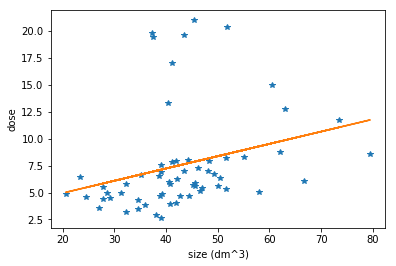

[[0.11423287]] [2.66675503]


In [139]:
reg = LinearRegression().fit(size, dose)

pred_dose = reg.predict(size)
plt.plot(size,dose,'*')
plt.plot(size,pred_dose)
plt.xlabel('size (dm^3)')
plt.ylabel('dose')
plt.show()


print(reg.coef_,reg.intercept_)

So the size has a positive correlation with the dosis used. The regression line is described by $$dose = 0.11423287 \cdot size(dm^3)+ 2.66675503 $$